# Natural language processing

Practical course material for the ASDM Class 09 (Text Mining) by Florian Leitner.

© 2016 Florian Leitner. All rights reserved.

## Installation and setup

NLTK-based NLP (should require no more additional steps):

In [2]:
from nltk import ne_chunk, pos_tag, word_tokenize as tokenize
from nltk.stem.snowball import EnglishStemmer

Stanford NLP tools wrapped from NLTK:

NB: Requires that you download the (_basic_) Stanford [PoS tagger](http://nlp.stanford.edu/software/tagger.shtml#Download) and [NER tagger](http://nlp.stanford.edu/software/CRF-NER.shtml#Download) ZIP packages, and put the following files from those two packages into a directory named "`stanford`" that itself should be located in the same directory as this notebook; From the NER tagger archive, use these two files:

* `stanford-ner.jar`
* `english.all.3class.distsim.crf.ser.gz`

And from the PoS tagger:

* `english-bidirectional-distsim.tagger`
* `slf4j-api.jar`
* `slf4j-simple.jar`
* `stanford-postagger.jar`

In [1]:
from nltk.tag.stanford import StanfordNERTagger as NERTagger
from nltk.tag.stanford import StanfordPOSTagger as POSTagger

The SpaCy NLP tool ([installation instructions](https://spacy.io/docs#install-spacy)):

In [3]:
import spacy

## Foreword

In this final class, we will explore Python-based means to apply the sequence tagging and chunking techniques discussed in class, namely part-of-speech tagging, named entity recognition, as well as syntactic parsing.

To be able to extract semantic relationships among concepts in text (in every sense, such as enabling us to understand the implicit semantics of the tweets we examined on day 4), it is necessary to analyze the text grammatically. This is commonly referred to as **parsing**, where _shallow_ parsing refers to the technique of only tagging individual tokens or **chunks** of them (without explicit relationships between chunks), and _deep_ parsing refers to techniques that reconstruct the entire grammatical **tree** among all tokens in a sentence. The resulting annotations in turn can be used as features for classifiers that learn to detect the presence of some (semantic) relationship among the (candidate) concepts.

A more in-depth introduction to most of what we are doing here - training chunkers, syntactic trees, NER with NLTK, etc. - is well documented in the NLTK Book, [Chapter 7](http://www.nltk.org/book/ch07.html) and [Chapter 8](http://www.nltk.org/book/ch08.html), which you might want to have a look at if you want to get more serious with NLTK or NLP in general.

## Quick-and-dirty Tagging, Chunking, and NER with NLTK

In [4]:
def analyze(sentence):
    return ne_chunk(pos_tag(tokenize(sentence)))

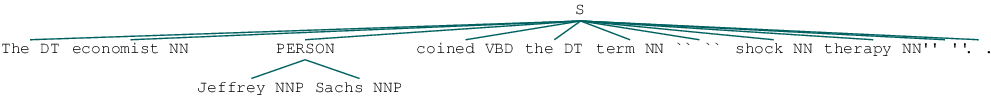

In [5]:
analyze('The economist Jeffrey Sachs coined the term "shock therapy".')

In [6]:
analyze('The economist Jeffrey Sachs coined the term "shock therapy".').pprint()

(S
  The/DT
  economist/NN
  (PERSON Jeffrey/NNP Sachs/NNP)
  coined/VBD
  the/DT
  term/NN
  ``/``
  shock/NN
  therapy/NN
  ''/''
  ./.)


In [7]:
analyze(u'The Google Nexus challenges the iPhone‘s dominance.').pprint()

(S
  The/DT
  (ORGANIZATION Google/NNP Nexus/NNP)
  challenges/VBZ
  the/DT
  iPhone‘s/NN
  dominance/NN
  ./.)


In [8]:
analyze(u'The quick brown fox jumped over the lazy dog.').pprint()

(S
  The/DT
  quick/JJ
  brown/NN
  fox/NN
  jumped/VBD
  over/IN
  the/DT
  lazy/JJ
  dog/NN
  ./.)


`GPE` = geo-political entity

NLTK's "default" tagging functionality via `ne_chunk( pos_tag( word_tokenize( sentence )))` certainly provides good-enough out-of-the-box results to play around with and make experiments, but if you need to provide high-quality results for some commericial or scientific application, you will soon "want more". 

Therefore, to round up the class, here you will learn where to download and how to install the [Stanford NER Tagger](http://nlp.stanford.edu/software/CRF-NER.shtml) and the [PoS Tagger](http://nlp.stanford.edu/software/tagger.shtml) with ready-made, trained models. Second, we will look at [SpaCy](https://spacy.io/), a  high-throughput deep parser for Python that is similarly useful to the Stanford Parser.

## Stanford PoS and NER Tagging with NLTK

Here, we will quickly access the two Stanford taggers via an API provided from NLTK. Note that this might not necessarily be the way you want to interact with the Stanford tools in a production setting. However, it is a quick and easy way to get a first prototype up and running.

In [9]:
ner = NERTagger('stanford/english.all.3class.distsim.crf.ser.gz',
                'stanford/stanford-ner.jar')
pos = POSTagger('stanford/english-bidirectional-distsim.tagger',
                'stanford/stanford-postagger.jar',
                java_options='-mx1000m -cp stanford/slf4j-simple.jar:stanford/slf4j-api.jar')
st = EnglishStemmer()

In [10]:
def stanford(sentence):
    tokens = tokenize(sentence)
    stems = map(st.stem, tokens)
    _, tags = zip(*pos.tag(tokens))
    _, entities = zip(*ner.tag(tokens))
    return list(zip(tokens, stems, tags, entities))

In [11]:
stanford('The quick brown fox jumped over the lazy dog.')

[('The', 'the', 'DT', 'O'),
 ('quick', 'quick', 'JJ', 'O'),
 ('brown', 'brown', 'JJ', 'O'),
 ('fox', 'fox', 'NN', 'O'),
 ('jumped', 'jump', 'VBD', 'O'),
 ('over', 'over', 'IN', 'O'),
 ('the', 'the', 'DT', 'O'),
 ('lazy', 'lazi', 'JJ', 'O'),
 ('dog', 'dog', 'NN', 'O'),
 ('.', '.', '.', 'O')]

In [13]:
stanford('A summer school in Madrid is sunnier than one in the UK.')

[('A', 'a', 'DT', 'O'),
 ('summer', 'summer', 'NN', 'O'),
 ('school', 'school', 'NN', 'O'),
 ('in', 'in', 'IN', 'O'),
 ('Madrid', 'madrid', 'NNP', 'LOCATION'),
 ('is', 'is', 'VBZ', 'O'),
 ('sunnier', 'sunnier', 'JJR', 'O'),
 ('than', 'than', 'IN', 'O'),
 ('one', 'one', 'CD', 'O'),
 ('in', 'in', 'IN', 'O'),
 ('the', 'the', 'DT', 'O'),
 ('UK', 'uk', 'NNP', 'LOCATION'),
 ('.', '.', '.', 'O')]

In [14]:
stanford('The economist Jeffrey Sachs coined the term "shock therapy".')

[('The', 'the', 'DT', 'O'),
 ('economist', 'economist', 'NN', 'O'),
 ('Jeffrey', 'jeffrey', 'NNP', 'PERSON'),
 ('Sachs', 'sach', 'NNP', 'PERSON'),
 ('coined', 'coin', 'VBD', 'O'),
 ('the', 'the', 'DT', 'O'),
 ('term', 'term', 'NN', 'O'),
 ('``', '``', '``', 'O'),
 ('shock', 'shock', 'NN', 'O'),
 ('therapy', 'therapi', 'NN', 'O'),
 ("''", "''", "''", 'O'),
 ('.', '.', '.', 'O')]

In [14]:
stanford('The Google Nexus challanges the iPhone‘s dominance.')

[('The', 'the', 'DT', 'O'),
 ('Google', 'googl', 'NNP', 'O'),
 ('Nexus', 'nexus', 'NNP', 'O'),
 ('challanges', 'challang', 'VBZ', 'O'),
 ('the', 'the', 'DT', 'O'),
 ('iPhone‘s', 'iphon', 'NN', 'O'),
 ('dominance', 'domin', 'NN', 'O'),
 ('.', '.', '.', 'O')]

Much better, indeed! Note, however, that this wrapper interfaces with the Stanford libraries in a rather inefficient way. So for processing large quantities of text, you certainly will need to brew up your own way of interfacing to these Java tools from Python (and probably generally will not use NLTK...).


Note that a [Python interface](http://projects.csail.mit.edu/spatial/Stanford_Parser) for the [Stanford (deep, neural) Parser](http://nlp.stanford.edu/software/lex-parser.html) exists, too. However, your instructor's suggested approach if you want to use the Stanford libraries (or any Java libraries, for that matter) from a Python project would be: Learn [Apache Thrift](https://thrift.apache.org/), run a Java Virtual Machine (VM) and a Python VM in parallel, and access the Java library through a Thrift interface you sketch up exactly towards your needs. Note to stay as high level as possible, e.g., design a Thrift API that accepts a whole plain-text document and returns all dependency-annotated sentences in one single call. If for some reason you need lower latencies, sentence-based interfaces typically still work well with the "Thrift way", too.

## Deep parsing with SpaCy

Instead of the Stanford tools, Python has a great neural parser of its own, [SpaCy](https://spacy.io/). It can easily be [installed](https://spacy.io/docs#getting-started) from both Conda and PIP3. (Don't forget to install and test the English language model!)

In [15]:
process = spacy.load('en')

In [16]:
doc = process('The quick brown fox jumped over the lazy dog.')

In [17]:
def show(doc):
    for token in doc:
        print(token, token.lemma_, '=',
              token.pos_, token.tag_, ':',
              token.dep_, '->', token.head)
    if doc.ents:
        print("\nNAMED ENTITIES")
        for entity in doc.ents:
            print(entity, entity.label_)

In [18]:
show(process('The quick brown fox jumped over the lazy dog.'))

The the = DET DT : det -> fox
quick quick = ADJ JJ : amod -> fox
brown brown = ADJ JJ : amod -> fox
fox fox = NOUN NN : nsubj -> jumped
jumped jump = VERB VBD : ROOT -> jumped
over over = ADP IN : prep -> jumped
the the = DET DT : det -> dog
lazy lazy = ADJ JJ : amod -> dog
dog dog = NOUN NN : pobj -> over
. . = PUNCT . : punct -> jumped


In [19]:
show(process('A summer school in Madrid is sunnier than one in the UK.'))

A a = DET DT : det -> school
summer summer = NOUN NN : compound -> school
school school = NOUN NN : nsubj -> is
in in = ADP IN : prep -> school
Madrid madrid = PROPN NNP : pobj -> in
is be = VERB VBZ : ROOT -> is
sunnier sunny = ADJ JJR : acomp -> is
than than = ADP IN : prep -> sunnier
one one = NUM CD : pobj -> than
in in = ADP IN : prep -> one
the the = DET DT : det -> UK.
UK. uk. = PROPN NNP : pobj -> in

NAMED ENTITIES
Madrid GPE
UK. ORG


In [20]:
show(process('The economist Jeffrey Sachs coined the term "shock therapy".'))

The the = DET DT : det -> economist
economist economist = NOUN NN : nsubj -> coined
Jeffrey jeffrey = PROPN NNP : compound -> Sachs
Sachs sachs = PROPN NNP : appos -> economist
coined coin = VERB VBD : ROOT -> coined
the the = DET DT : det -> term
term term = NOUN NN : dobj -> coined
" " = PUNCT `` : punct -> term
shock shock = NOUN NN : compound -> therapy
therapy therapy = NOUN NN : appos -> term
" " = PUNCT '' : punct -> coined
. . = PUNCT . : punct -> coined

NAMED ENTITIES
Jeffrey Sachs PERSON


In [21]:
show(process('The Google Nexus challanges the iPhone‘s dominance.'))

The the = DET DT : det -> Nexus
Google google = PROPN NNP : compound -> Nexus
Nexus nexus = PROPN NNP : nsubj -> challanges
challanges challanges = VERB VBZ : ROOT -> challanges
the the = DET DT : det -> dominance
iPhone‘s iphone‘s = ADJ JJ : amod -> dominance
dominance dominance = NOUN NN : dobj -> challanges
. . = PUNCT . : punct -> challanges

NAMED ENTITIES
Google ORG


Overall, SpaCy's PoS tagging and deep parsing is competitive to the Stanford Parser (note the slip above, tagging "[the] iPhone" as an adjective), but its named entity detection model is clearly worse than the Stanford NER Tagger. The Stanford NER tagger probably is the world-leading, _available_, and _working_ implementation for this task. SpaCy does not provide support for as many languages (currently, only English and with German support coming along) and a generally smaller collection of additional functionality. Nonetheless, if you can live with these tradeoffs, SpaCy certainly is a recommendable and "pythonic" alternative to the Java Stanford NLP tools.

## Training your own sequence taggers

For other sequence taggers, NLTK provides wrappers to some of the most powerfull CRF taggers around, like [MALLET](http://mallet.cs.umass.edu). Furthermore, due the nature of Python, it is very easy to write wrappers for C(++)-based NLP tools; e.g., [CRFsuite](http://www.chokkan.org/software/crfsuite/), a high-speed CRF in "pure" C, comes with a Python wrapper. As long as they have a I/O (stdin/stdout) interface to send and receive text, for any others as well, for example the all-in-one [GENIA Tagger](http://www.nactem.ac.uk/tsujii/GENIA/tagger/) for the biomedical domain.

To train your own NER models for newswire, you could use the [CoNLL2003](http://www.cnts.ua.ac.be/conll2003/ner/) corpus. Gabrilovich provides a (slightly oldish) [list](http://www.cs.technion.ac.il/~gabr/resources/data/ne_datasets.html) (from 2006) of "standard" NER-tagger corpora (PER/ORG/GPE...). If you were interested in detecting gene and protein names, you might have a look at the [BioCreative](http://www.biocreative.org/) gene-entity corpora (Note that you have to register on the website before you can download any corpus on the site, thereby confirming that you will not use the data for commerical purposes.)

## Afterword

By now you have learned about all the types of tools you will need to design industry-strength statistical text mining and natural language processing pipelines. In particular, for Python-based implementations of batch text analytics, you have seen a good selection of available libraries and tools. It will take practice and patience to get all these pieces to work properly with real-world data that is highly noisy and full of "unexpected pitfalls", but we have touched all the foundations you will need for this kind of work.